In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
df = pd.read_csv(r'C:\Users\ibrah\OneDrive\Pictures\Bracu courses\CSE422\project ML\StudentPerformanceFactors.csv')

print(f'Total number of data points: {df.shape[0]}')


Total number of data points: 6607


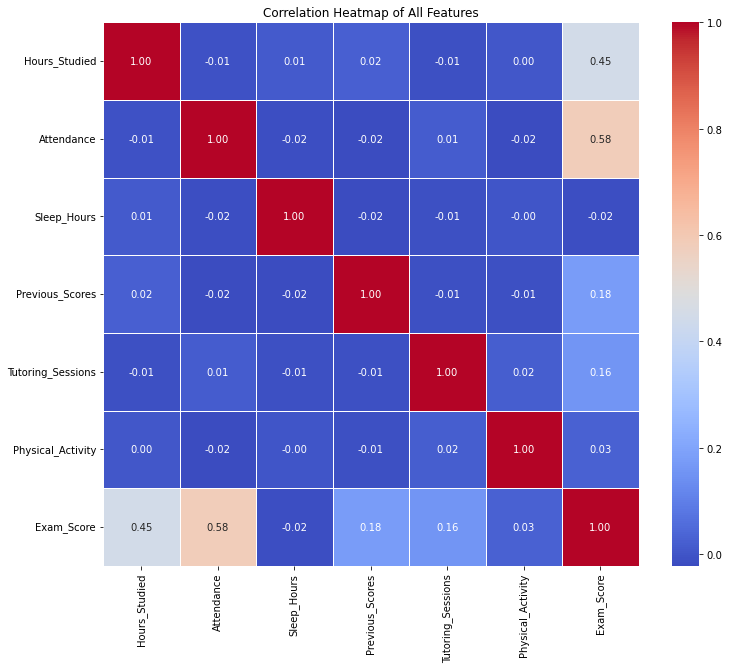

In [6]:
#CORRELATION OF FEATURES USING HEATMAP
import seaborn as sns
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Correlation Heatmap of All Features')
plt.show()


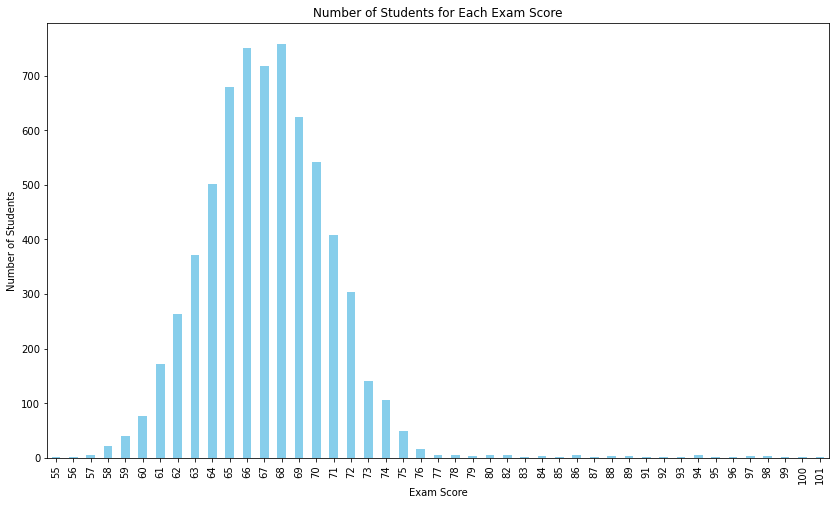

In [7]:
#DISTRIBUTION FOR THE OUTPUT FEATURE
score_counts = df['Exam_Score'].value_counts().sort_index()

plt.figure(figsize=(14, 8))
score_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Students for Each Exam Score')
plt.xlabel('Exam Score')
plt.ylabel('Number of Students')
plt.show()

In [9]:
#IMPUTATION FOR NULL VALUES
print("Initial null value counts:\n", df.isnull().sum())
df['Teacher_Quality'].fillna(df['Teacher_Quality'].mode()[0], inplace=True)
df['Parental_Education_Level'].fillna(df['Parental_Education_Level'].mode()[0], inplace=True)
df['Distance_from_Home'].fillna(df['Distance_from_Home'].mode()[0], inplace=True)
print("\nNull value counts after imputation:\n", df.isnull().sum())

Initial null value counts:
 Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

Null value counts after imputation:
 Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Inter

In [10]:
#ENCODING FOR CATEGORICAL FEATURES

# Ordinal Encoding
df['Parental_Involvement'] = df['Parental_Involvement'].map({'Low': 1, 'Medium': 2, 'High': 3})
df['Access_to_Resources'] = df['Access_to_Resources'].map({'Low': 1, 'Medium': 2, 'High': 3})
df['Motivation_Level'] = df['Motivation_Level'].map({'Low': 1, 'Medium': 2, 'High': 3})
df['Family_Income'] = df['Family_Income'].map({'Low': 1, 'Medium': 2, 'High': 3})
df['Teacher_Quality'] = df['Teacher_Quality'].map({'Low': 1, 'Medium': 2, 'High': 3})
df['Parental_Education_Level'] = df['Parental_Education_Level'].map({'High School': 1, 'College': 2, 'Postgraduate': 3})
df['Distance_from_Home'] = df['Distance_from_Home'].map({'Near': 1, 'Moderate': 2, 'Far': 3})
# Label Encoding
df['Extracurricular_Activities'] = df['Extracurricular_Activities'].map({'No': 0, 'Yes': 1})
df['Internet_Access'] = df['Internet_Access'].map({'No': 0, 'Yes': 1})
df['School_Type'] = df['School_Type'].map({'Public': 0, 'Private': 1})
df['Learning_Disabilities'] = df['Learning_Disabilities'].map({'No': 0, 'Yes': 1})
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
# One-Hot Encoding
df = pd.get_dummies(df, columns=['Peer_Influence'])
def convert_to_grade(score):
    if score >= 85:
        return 'A'
    elif score >= 70:
        return 'B'
    elif score >= 55:
        return 'C'
    elif score >= 40:
        return 'D'
    elif score >= 25:
        return 'E'
    else:
        return 'F'

df['Exam_Score_Category'] = df['Exam_Score'].apply(convert_to_grade)
print(df.head())


   Hours_Studied  Attendance  Parental_Involvement  Access_to_Resources  \
0             23          84                     1                    3   
1             19          64                     1                    2   
2             24          98                     2                    2   
3             29          89                     1                    2   
4             19          92                     2                    2   

   Extracurricular_Activities  Sleep_Hours  Previous_Scores  Motivation_Level  \
0                           0            7               73                 1   
1                           0            8               59                 1   
2                           1            7               91                 2   
3                           1            8               98                 2   
4                           1            6               65                 2   

   Internet_Access  Tutoring_Sessions  ...  Physical_Activity 

In [11]:
#SCALING AND SPLITTING

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


X = df.drop(columns=['Exam_Score', 'Exam_Score_Category'])
y = df['Exam_Score_Category']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [12]:
#TRAINING AND TESTING USING KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score

model_knn = KNeighborsClassifier()
model_knn.fit(x_train, y_train)

predictions_knn = model_knn.predict(x_test)

conf_matrix_knn = confusion_matrix(y_test, predictions_knn)
print("KNN Confusion Matrix:\n", conf_matrix_knn)
accuracy_knn = accuracy_score(y_test, predictions_knn)
print(f'Accuracy: {accuracy_knn}')

report_knn = classification_report(y_test, predictions_knn,zero_division=0)
#print("Classification Report:\n", report_knn)

precision_knn = precision_score(y_test, predictions_knn, average='weighted',zero_division=0)
recall_knn = recall_score(y_test, predictions_knn, average='weighted',zero_division=0)
print(f'Precision: {precision_knn}')
print(f'Recall: {recall_knn}')

KNN Confusion Matrix:
 [[   0    2    6]
 [   0  225  265]
 [   0   65 1420]]
Accuracy: 0.8295511850731215
Precision: 0.8192547123398706
Recall: 0.8295511850731215


In [13]:
#TESTING AND TRAINING USING LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score

model_lr = LogisticRegression()
model_lr.fit(x_train, y_train)
predictions_lr = model_lr.predict(x_test)

conf_matrix_lr = confusion_matrix(y_test, predictions_lr)
print("Logistic Regression Confusion Matrix:\n", conf_matrix_lr)

accuracy_lr = accuracy_score(y_test, predictions_lr)
print(f'Accuracy: {accuracy_lr}')

report_lr = classification_report(y_test, predictions_lr,zero_division=0)
#print("Classification Report:\n", report_lr)

precision_lr = precision_score(y_test, predictions_lr, average='weighted',zero_division=0)
recall_lr = recall_score(y_test, predictions_lr, average='weighted',zero_division=0)
print(f'Precision: {precision_lr}')
print(f'Recall: {recall_lr}')


Logistic Regression Confusion Matrix:
 [[   0    3    5]
 [   0  468   22]
 [   0    9 1476]]
Accuracy: 0.9803328290468987
Precision: 0.9763355286401478
Recall: 0.9803328290468987


In [14]:
#TESTING AND TRAINING USING NAIVE BAYES
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()
model_nb.fit(x_train, y_train)

predictions_nb = model_nb.predict(x_test)

conf_matrix_nb = confusion_matrix(y_test, predictions_nb)
print("Naive Bayes Confusion Matrix:\n", conf_matrix_nb)

accuracy_nb = accuracy_score(y_test, predictions_nb)
print(f'Accuracy: {accuracy_nb}')

report_nb = classification_report(y_test, predictions_nb,zero_division=0)
#print("Classification Report:\n", report_nb)

precision_nb = precision_score(y_test, predictions_nb, average='weighted',zero_division=0)
recall_nb = recall_score(y_test, predictions_nb, average='weighted',zero_division=0)
print(f'Precision: {precision_nb}')
print(f'Recall: {recall_nb}')

Naive Bayes Confusion Matrix:
 [[   0    3    5]
 [   0  366  124]
 [   0   36 1449]]
Accuracy: 0.9152798789712556
Precision: 0.9109518287502637
Recall: 0.9152798789712556


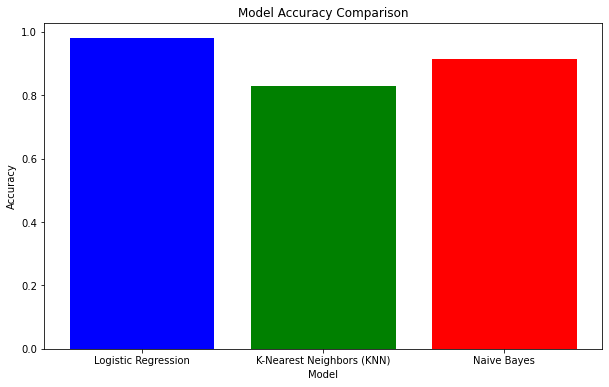

In [15]:
models = ['Logistic Regression', 'K-Nearest Neighbors (KNN)', 'Naive Bayes']
accuracy = [accuracy_lr, accuracy_knn, accuracy_nb]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracy, color=['blue', 'green', 'red'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()